In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rxn_ca.core import ReactionResult
from rxn_ca.analysis import ReactionAnalyzer
from rxn_ca.computing.schemas.ca_result_schema import RxnCAResultDoc
from rxn_ca.analysis.bulk_reaction_analyzer import BulkReactionAnalyzer
from rxn_ca import get_scored_rxns
from rxn_ca.core.heating import HeatingSchedule, HeatingStep

/Users/mgallant/anaconda3/envs/rxn-ca/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-20 20:26:57,687	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


# One Stage

In [5]:
res_fname = "vir-2023-12-20-201409.json"

In [6]:
results = RxnCAResultDoc.from_file(res_fname)

Constructing result from diffs: 100%|█| 1635010/1635010 [00:02<00
Constructing result from diffs: 100%|█| 1635010/1635010 [00:02<00
Constructing result from diffs: 100%|█| 1635010/1635010 [00:02<00


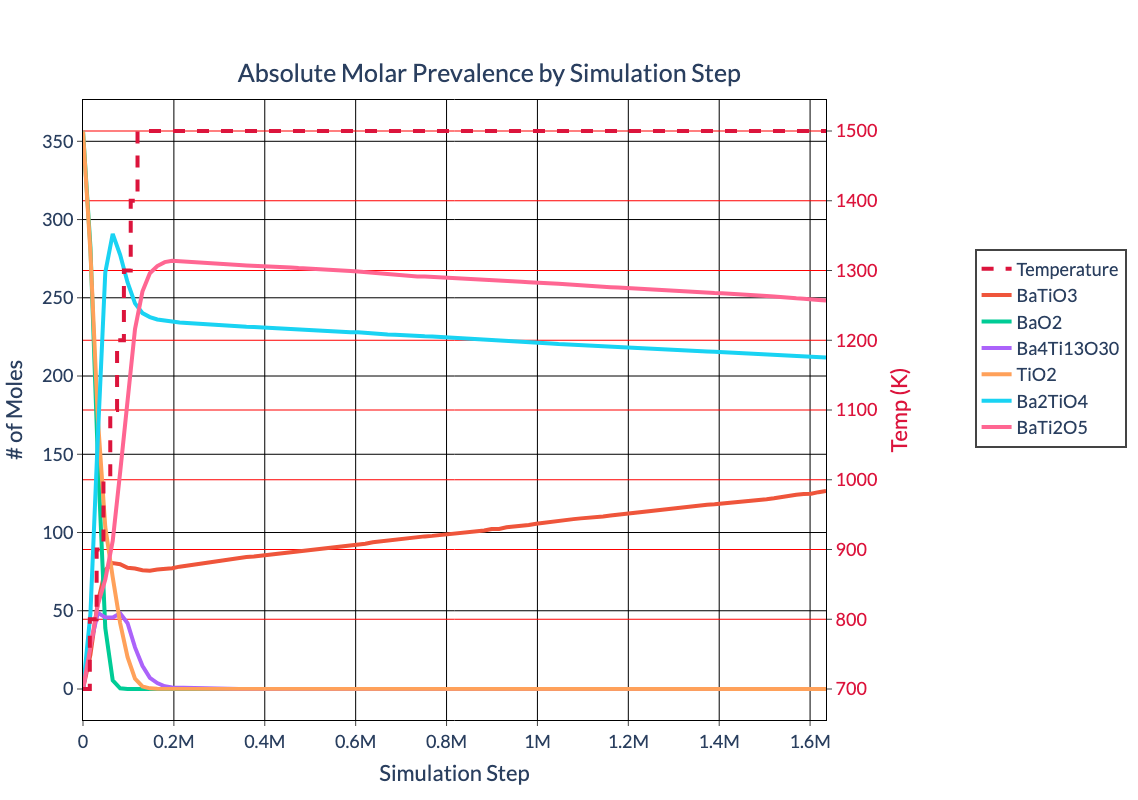

In [7]:
analyzer = BulkReactionAnalyzer.from_result_doc_file(res_fname)
analyzer.plot_molar_phase_amounts(xrd_adjust=True)

Constructing result from diffs: 100%|█| 1635010/1635010 [00:01<00
Constructing result from diffs: 100%|█| 1635010/1635010 [00:01<00
Constructing result from diffs: 100%|█| 1635010/1635010 [00:01<00


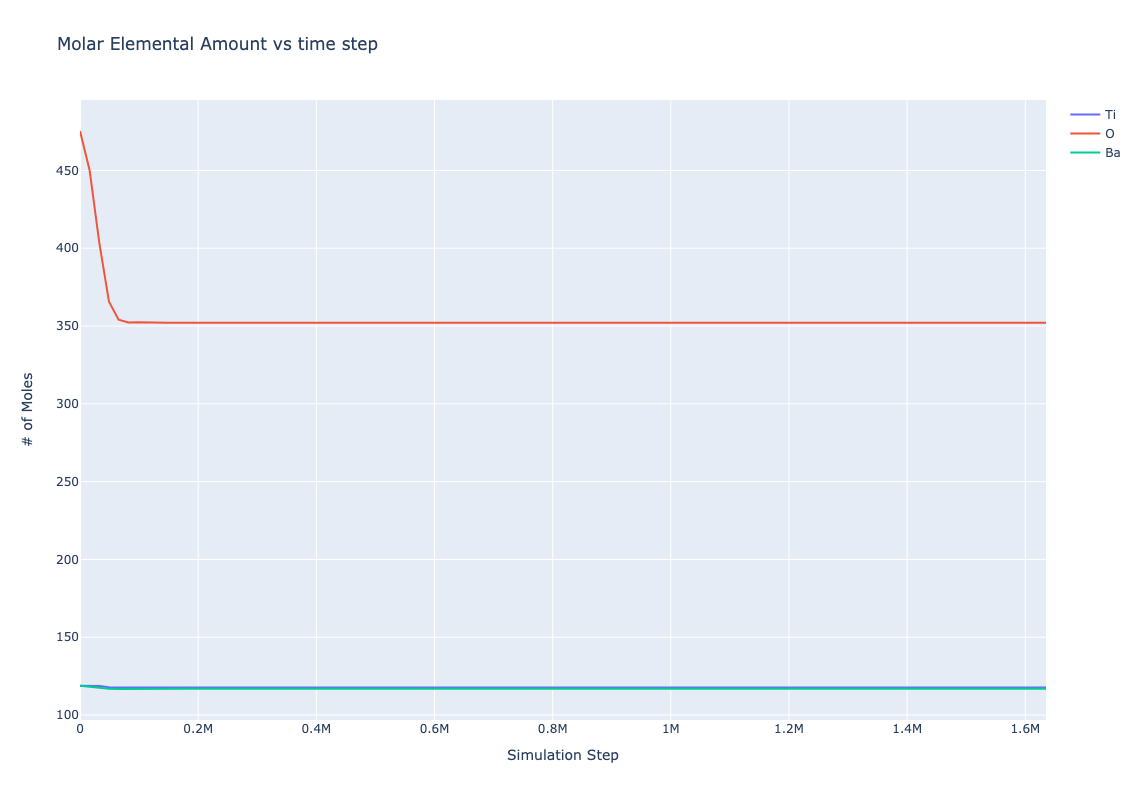

In [8]:
analyzer.plot_elemental_amounts()

# Multi Stage

In [152]:
res_fname = "multi_stage-2023-12-07-153244.json"
results = RxnCAResultDoc.from_file(res_fname)


updated


Constructing result from diffs: 100%|█| 400000/400000 [00:01<00:00, 362747.24i
Constructing result from diffs: 100%|█| 400000/400000 [00:01<00:00, 354643.88i
Constructing result from diffs: 100%|█| 400000/400000 [00:01<00:00, 354705.21i


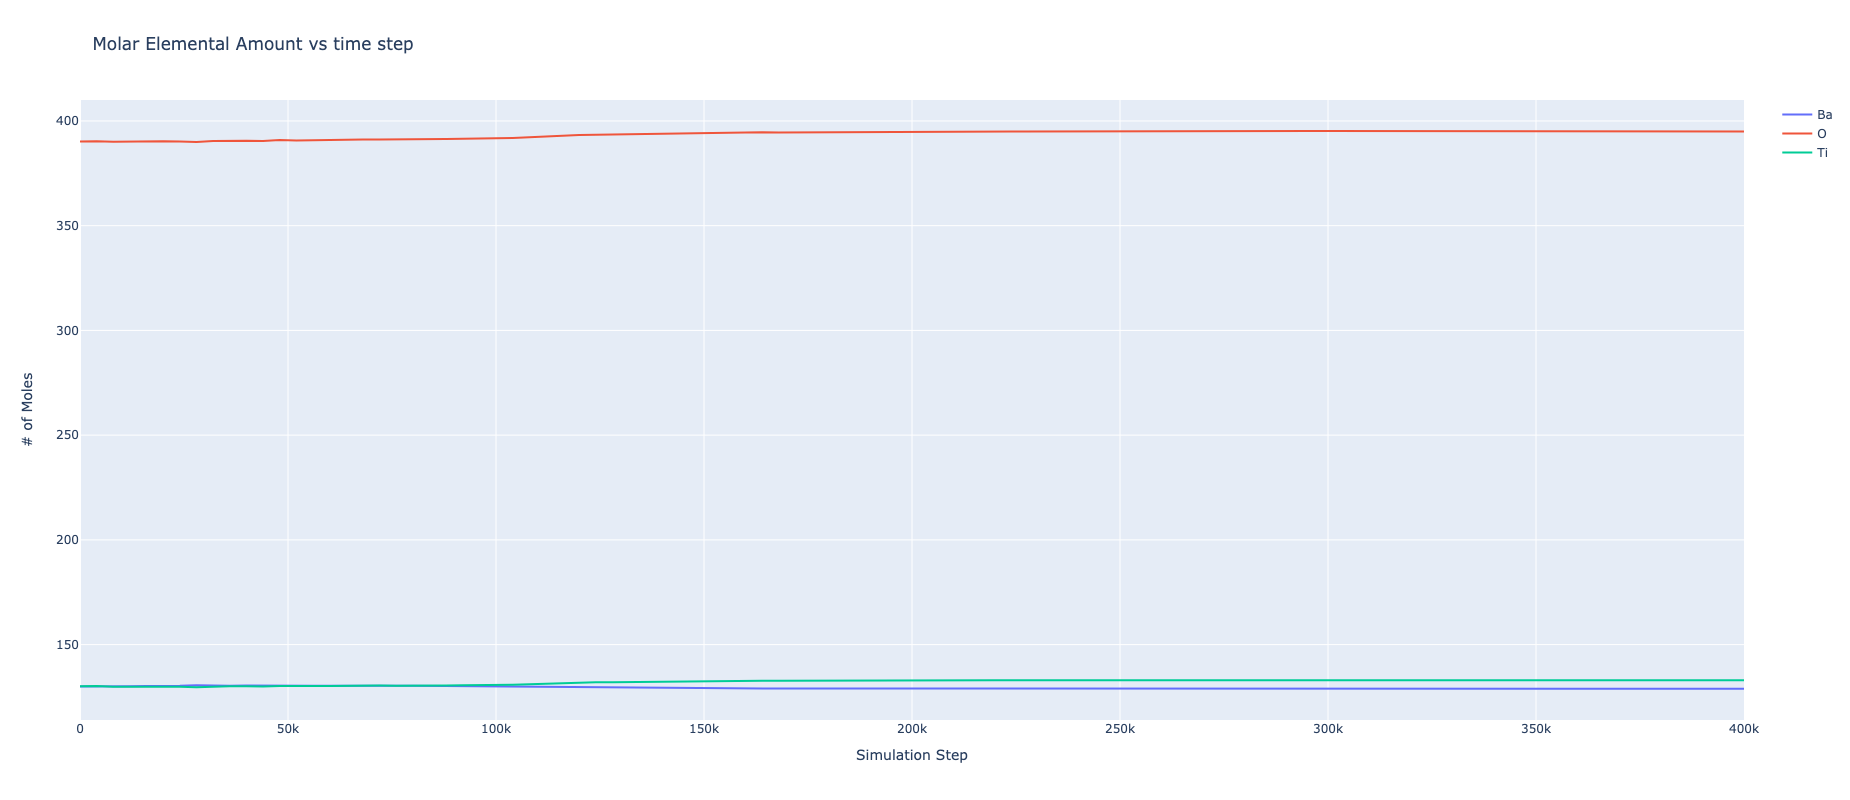

In [153]:
analyzer = BulkReactionAnalyzer.from_result_doc_file(res_fname)
analyzer.plot_elemental_amounts()

Constructing result from diffs: 100%|█| 400000/400000 [00:00<00:00, 1218620.83
Constructing result from diffs: 100%|█| 400000/400000 [00:00<00:00, 1237600.99
Constructing result from diffs: 100%|█| 400000/400000 [00:00<00:00, 1220233.05


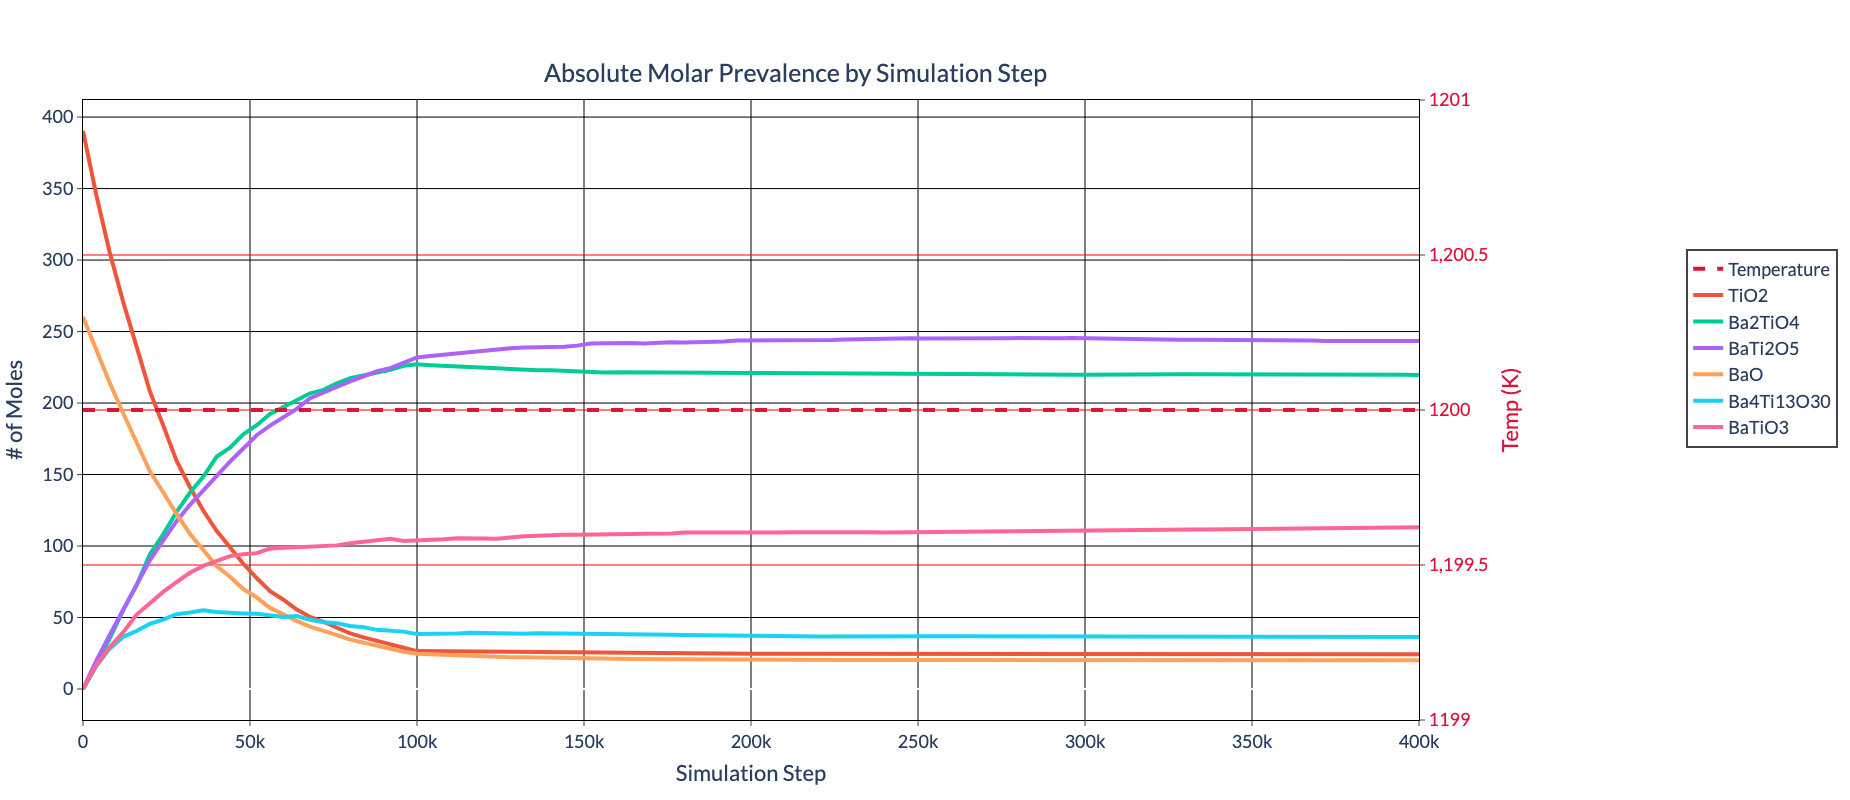

In [155]:
analyzer.plot_molar_phase_amounts(xrd_adjust=True)

In [107]:
rxns = results.reaction_library.get_rxns_at_temp(1200)

In [113]:
results.reaction_library.phases.phases

['Ba2Ti9O20',
 'Ti8O13',
 'BaTi5O11',
 'Ti3O',
 'Ti',
 'Ba4Ti12O27',
 'BaO',
 'Ti2O',
 'BaTi6O12',
 'BaTiO3',
 'Free Space',
 'Ba',
 'Ba2TiO4',
 'BaTi7O14',
 'Ti2O3',
 'Ba3Ti20O40',
 'BaTi8O16',
 'BaTi4O9',
 'Ba2Ti6O13',
 'BaO2',
 'Ti3O5',
 'Ba2Ti13O22',
 'TiO2',
 'BaTi2O5',
 'Ti6O',
 'Ba3TiO5',
 'Ba4Ti13O30',
 'TiO',
 'O2',
 'Ti13O22']

In [131]:
rxns.get_reactions(["Ti2O", "Ti3O"])

[]

In [126]:
rxns.get_reactions(["Ti13O22"])

[]

In [49]:
for r in rxns.search_all(products=["BaTiO3"], reactants=["Ba2TiO4", "BaTi2O5"]):
    print(r)

36.95BaTi2O5+42.05Ba2TiO4->65.57BaTiO3, Score: 0.0009421337484515984, E/atom: 0.01451004305256944


In [45]:
for r in rxns.search_all(products=["BaTi2O5"], reactants=["Ba2TiO4", "TiO2"]):
    print(r)

63.07Ba2TiO4+51.59TiO2->110.85BaTi2O5, Score: 0.8448668565733082, E/atom: -0.05373435288246276


updated


Constructing result from diffs: 100%|█| 235000/235000 [00:00<00:00, 1249380.72
Constructing result from diffs: 100%|█| 235000/235000 [00:00<00:00, 1264324.99
Constructing result from diffs: 100%|█| 235000/235000 [00:00<00:00, 1298012.59


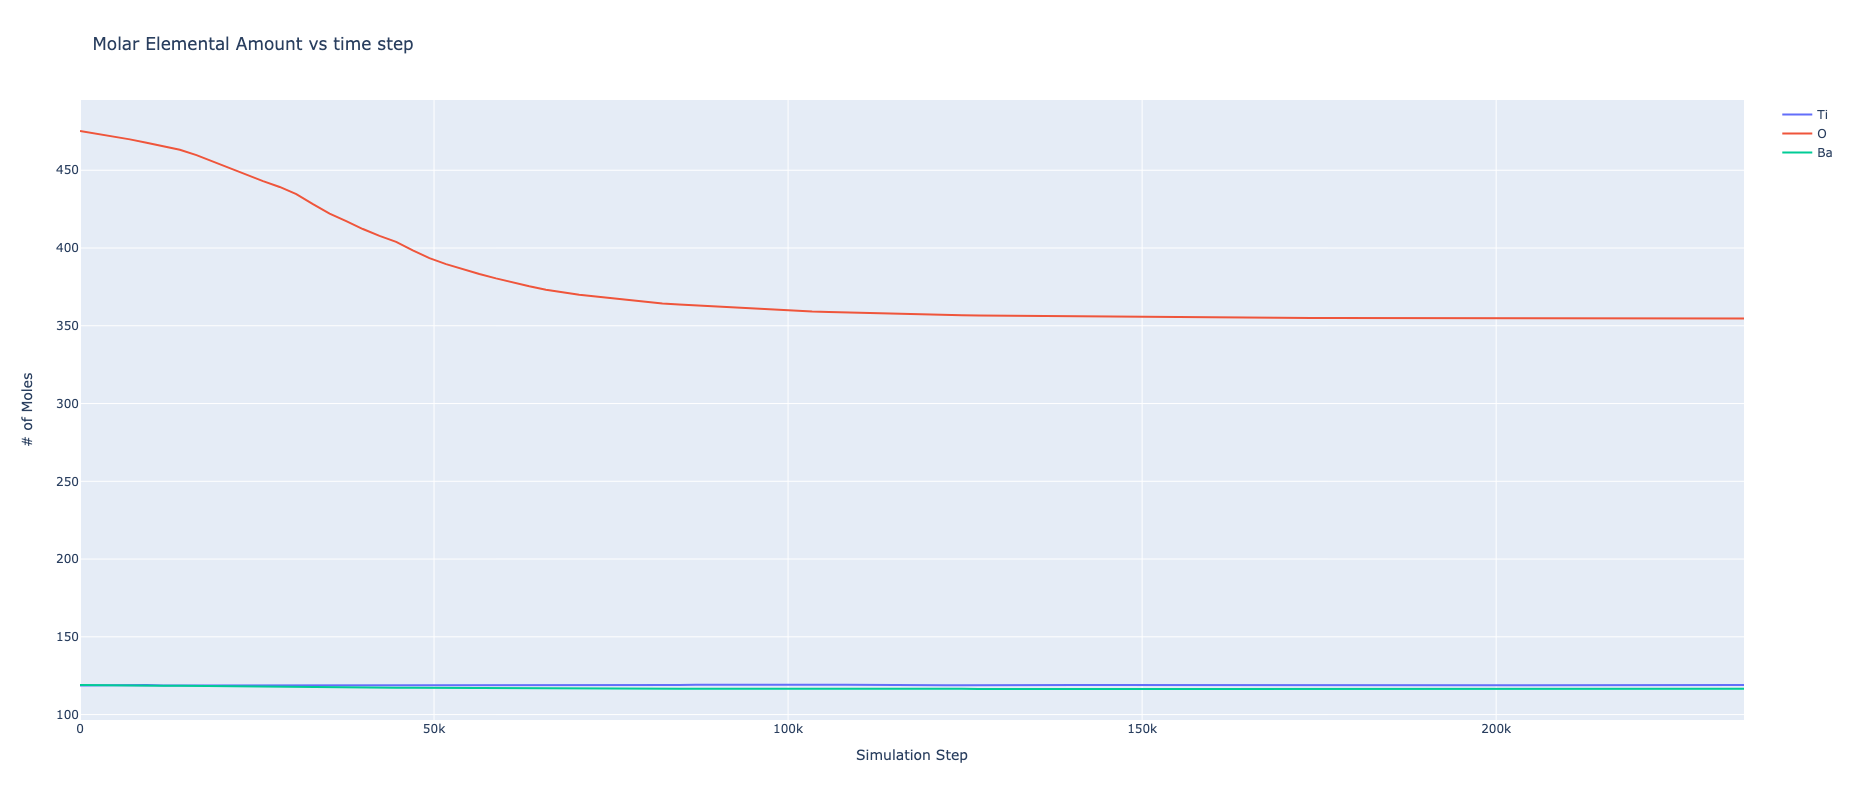

In [30]:
analyzer.plot_elemental_amounts()

In [7]:
result = RxnCAResultDoc.from_file(res_fname)

In [17]:
result.reaction_library.phases.get_melting_point("BaO2")

1377

Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 1113271.94
Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 1188711.18
Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 1279997.40


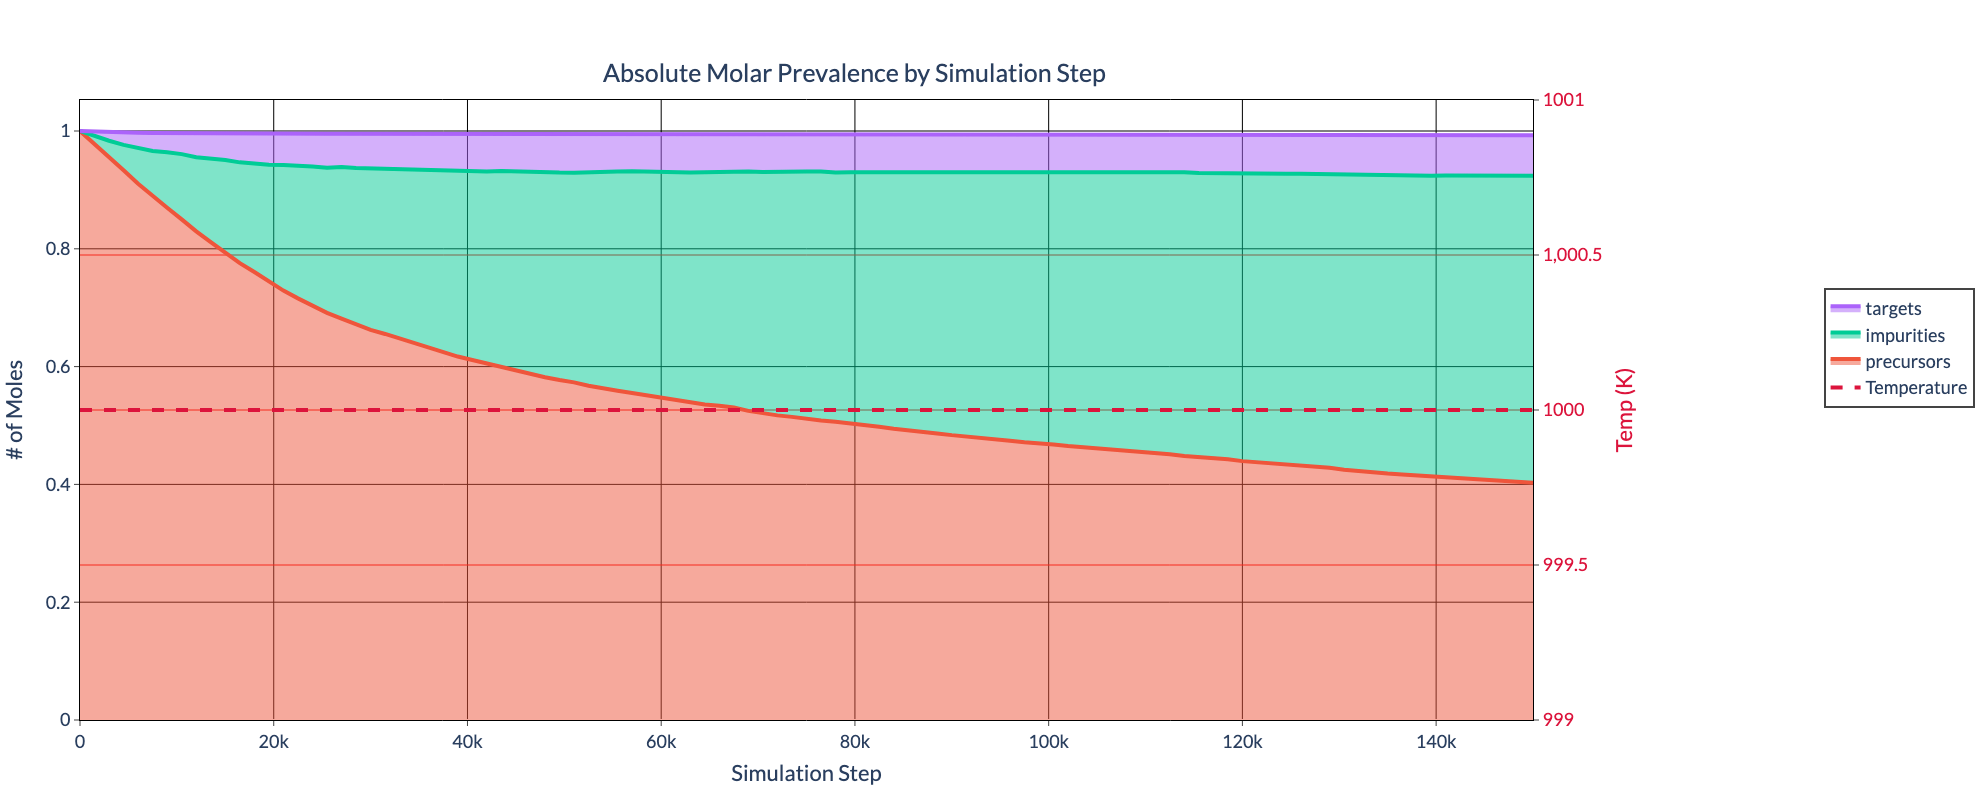

In [40]:
groups = {
    "precursors": ["TiO2", "BaO2"],
    "impurities": ["Ba2TiO4", "BaTi2O5"],
    "targets": ["BaTiO3"]
}

analyzer.plot_groups(groups)

updated


Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 1138650.88
Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 1177311.04
Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 1268551.24


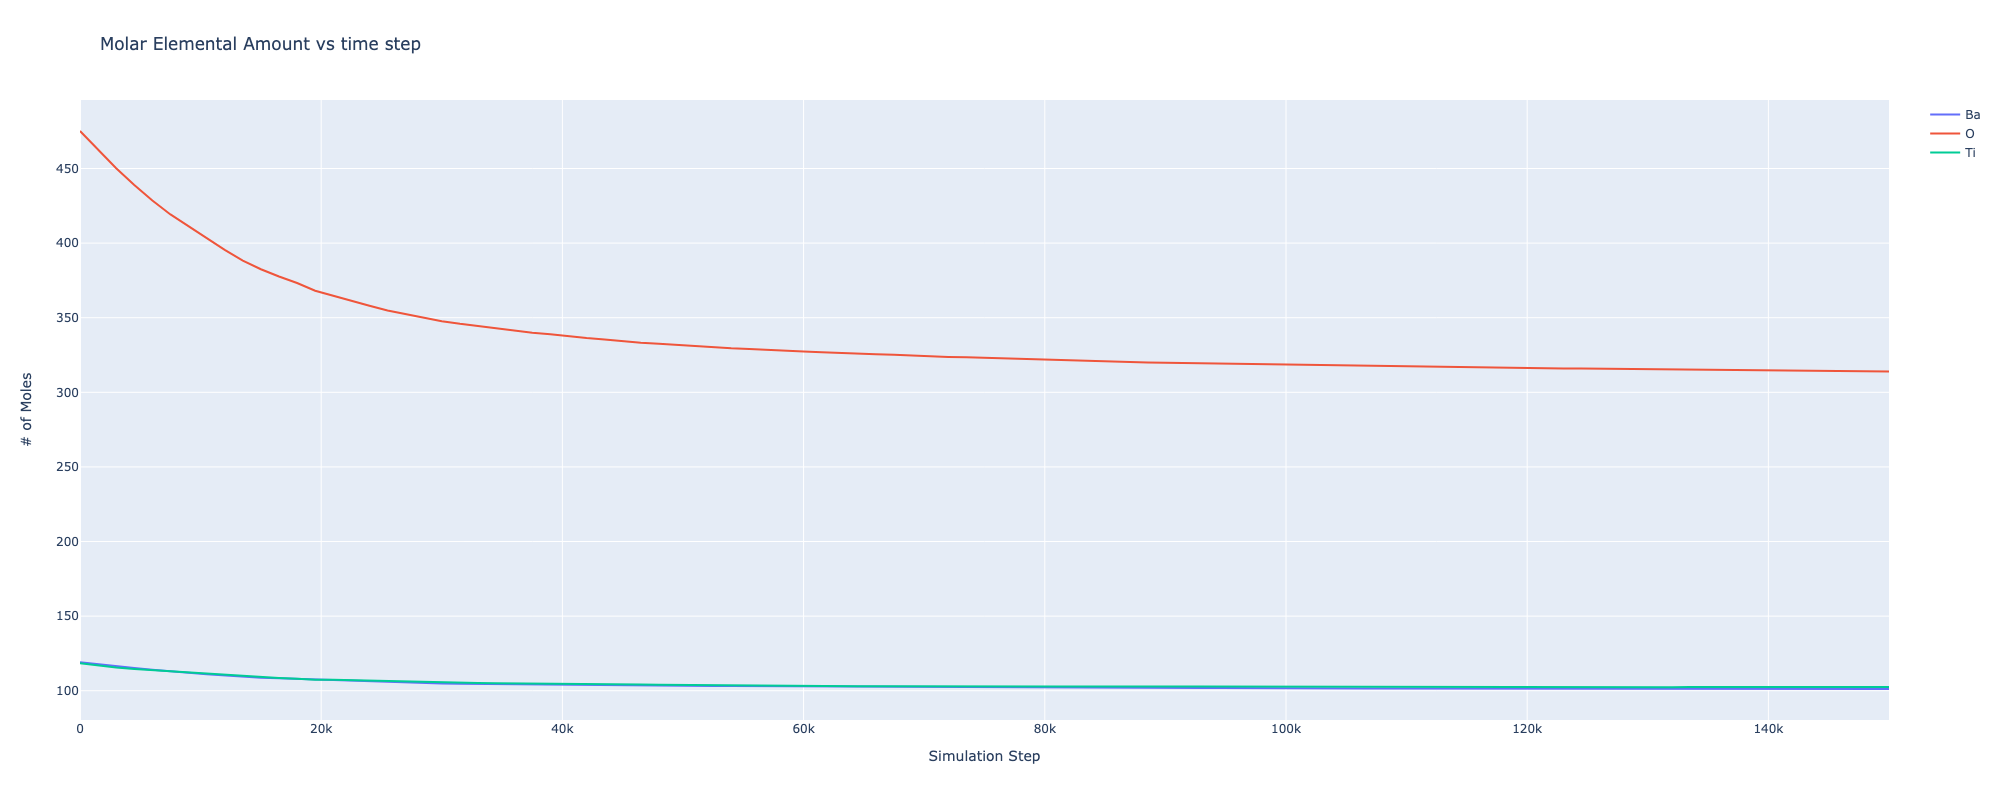

In [41]:
analyzer.plot_elemental_amounts()

Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 193062.11i
Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 192413.51i
Constructing result from diffs: 100%|█| 150000/150000 [00:00<00:00, 191728.04i


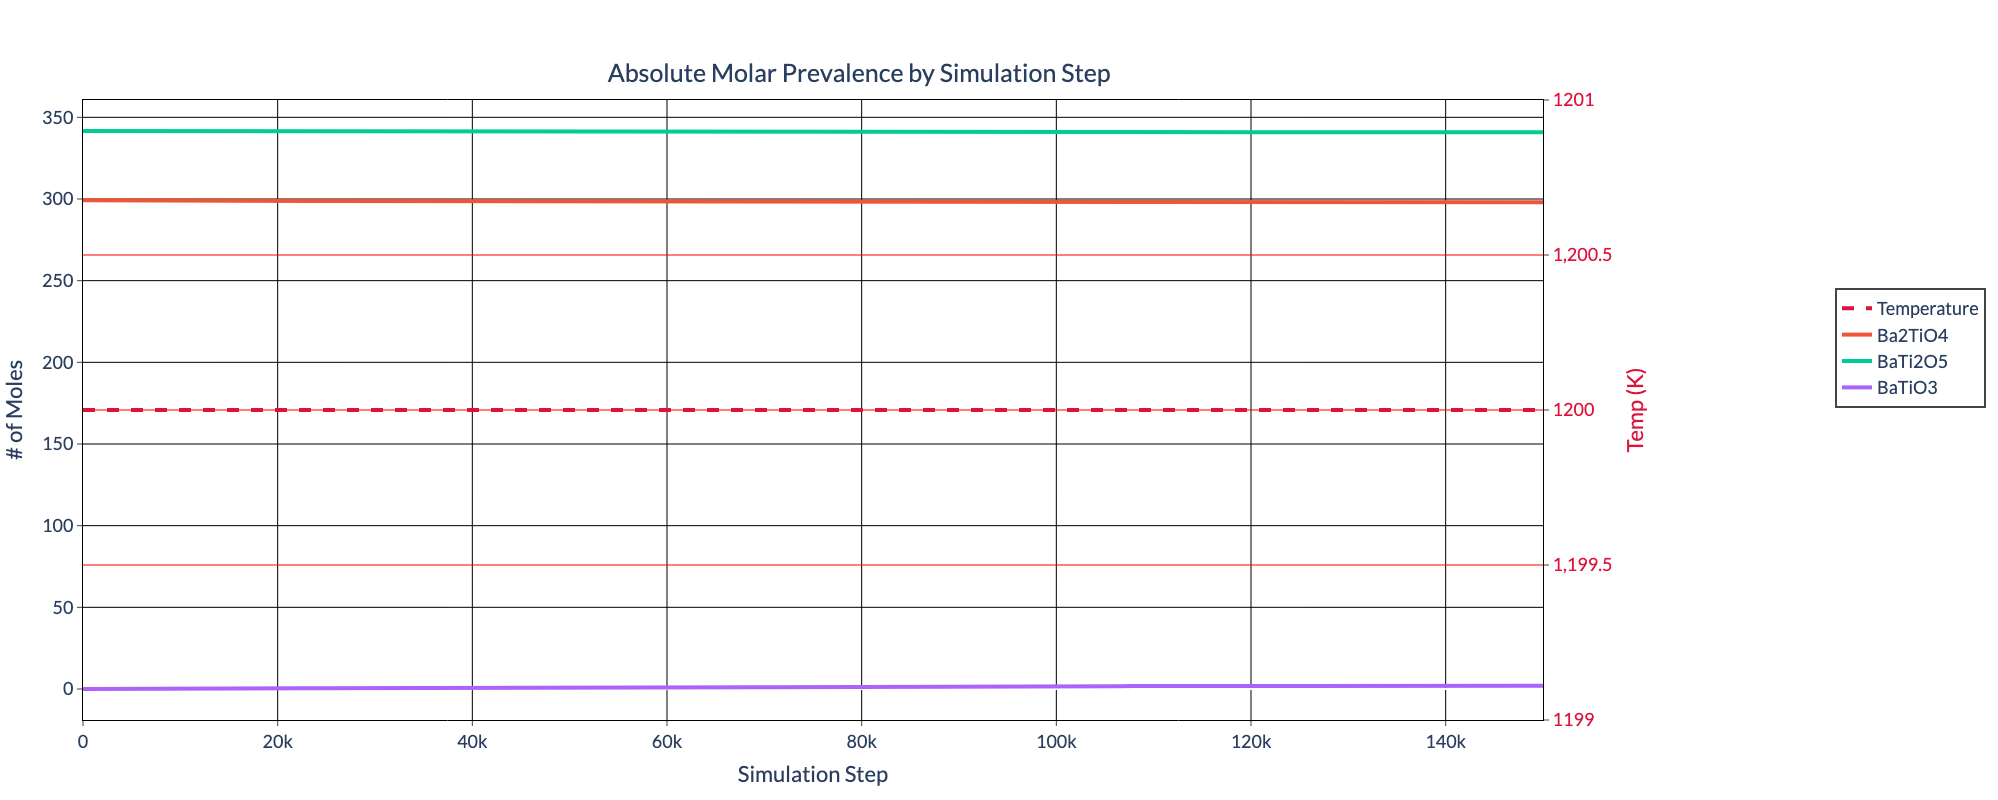

In [42]:
analyzer = BulkReactionAnalyzer.from_result_doc_file("batiO4_bati2o5_result.json")
analyzer.plot_molar_phase_amounts(min_prevalence=1, xrd_adjust=True)

Constructing result from diffs: 100%|██████████████████████████████████████████████████████████████| 150000/150000 [00:00<00:00, 189003.50it/s]


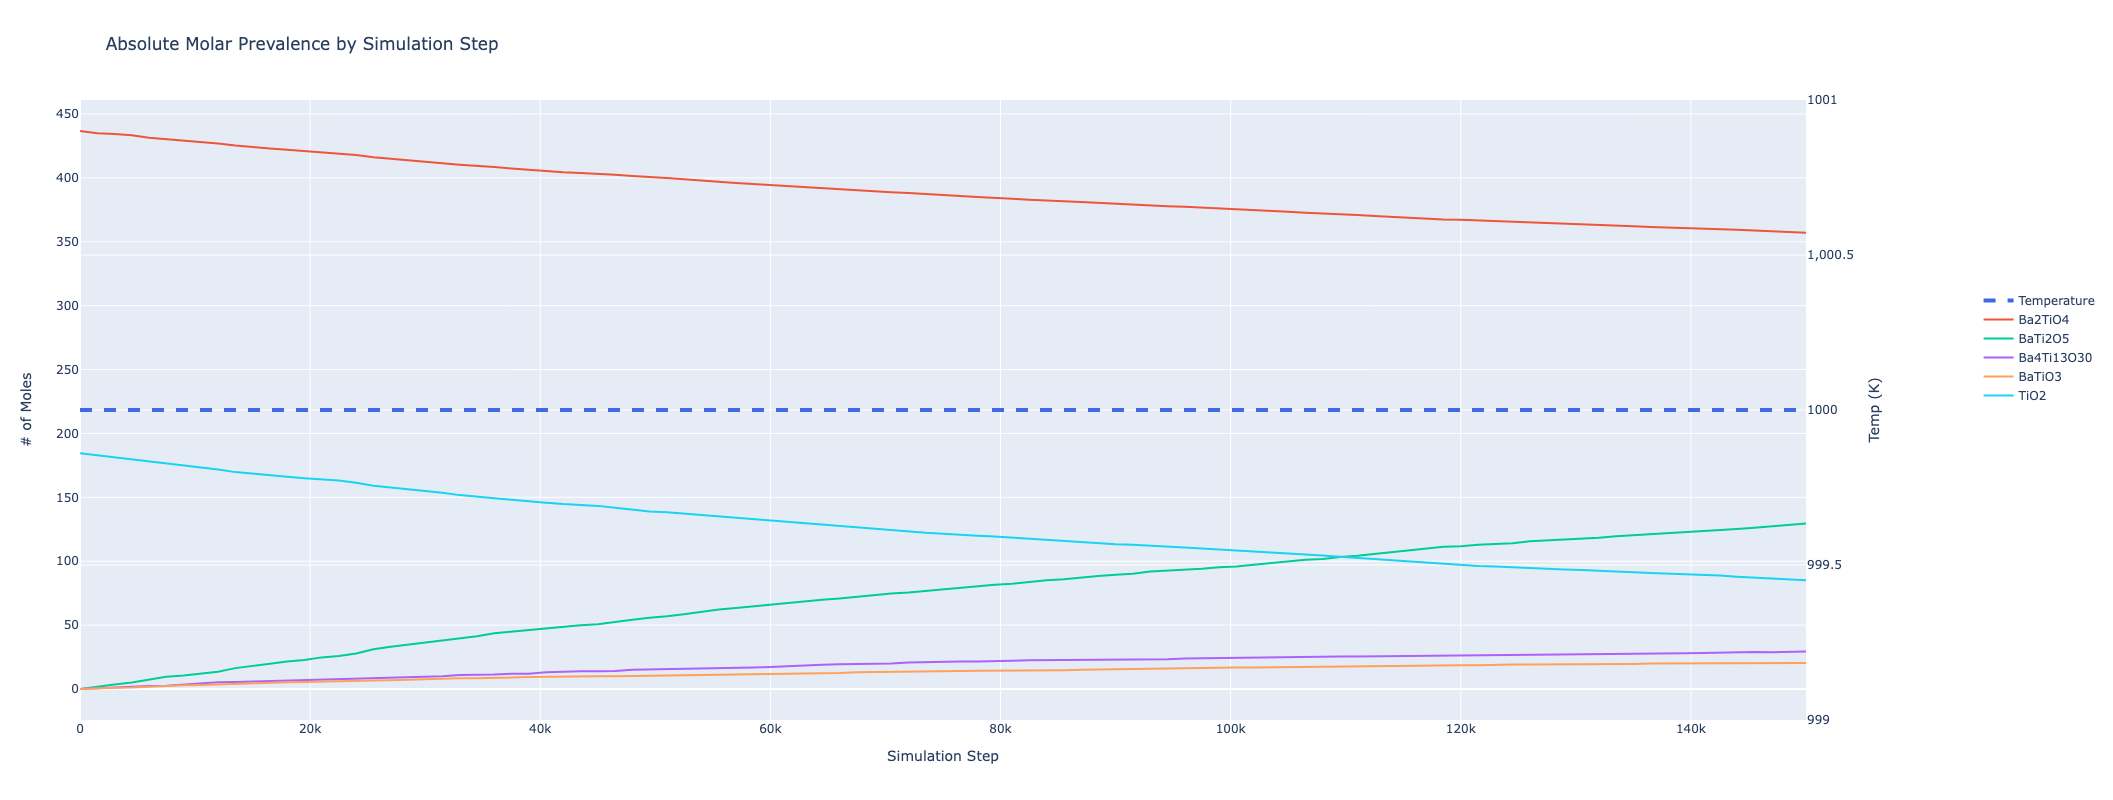

In [32]:
analyzer = BulkReactionAnalyzer.from_result_doc_file("2023-09-05-094841.json")
analyzer.plot_molar_phase_amounts(min_prevalence=1, xrd_adjust=True)